=== Starting Multi-World Forecasting Experiment ===
Settings: 100 samples, 2 worlds, prefix_len=50, horizon=40

Generating multi-world time series data...
[50, 50]

Training forecasting models...


 24%|██▎       | 236/1000 [00:00<00:00, 1179.75it/s]

Epoch 0: NLL = 1.1903
Epoch 200: NLL = 0.0018


 60%|█████▉    | 597/1000 [00:00<00:00, 1190.46it/s]

Epoch 400: NLL = 0.0018
Epoch 600: NLL = 0.0185


100%|██████████| 1000/1000 [00:00<00:00, 1170.77it/s]

Epoch 800: NLL = 0.1158


using device cuda:0
Preparing training data...


100%|██████████| 100/100 [00:00<00:00, 182202.61it/s]
/pfs/data6/home/ma/ma_ma/ma_kreffert/Probabilistic_LTSF/notebooks/experiments/multi_world_experiment.py:331: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # [n_samples, input_len, 1]


Training with 1000 samples in batches of 64


  1%|          | 1/100 [00:01<01:40,  1.01s/it]

Epoch 0 | Avg NLL: 1.1239


 11%|█         | 11/100 [00:09<01:11,  1.25it/s]

Epoch 10 | Avg NLL: -0.1186


 21%|██        | 21/100 [00:17<01:03,  1.25it/s]

Epoch 20 | Avg NLL: -0.1737


 31%|███       | 31/100 [00:25<00:55,  1.25it/s]

Epoch 30 | Avg NLL: -0.1947


 41%|████      | 41/100 [00:33<00:47,  1.25it/s]

Epoch 40 | Avg NLL: -0.2072


 51%|█████     | 51/100 [00:40<00:39,  1.25it/s]

Epoch 50 | Avg NLL: -0.2140


 61%|██████    | 61/100 [00:48<00:31,  1.25it/s]

Epoch 60 | Avg NLL: -0.2127


 71%|███████   | 71/100 [00:56<00:23,  1.25it/s]

Epoch 70 | Avg NLL: -0.2138


 81%|████████  | 81/100 [01:04<00:15,  1.25it/s]

Epoch 80 | Avg NLL: -0.2310


 91%|█████████ | 91/100 [01:12<00:07,  1.25it/s]

Epoch 90 | Avg NLL: -0.2181


100%|██████████| 100/100 [01:20<00:00,  1.25it/s]



Evaluating models...

=== Model Evaluation Summary ===
Test sample index: 53

Negative Log-Likelihood (NLL) - lower is better:
  DMS         : 0.144
  IMS         : 5.572
  Ground Truth: -0.786

Entropy - measures uncertainty:
  DMS         : 0.014
  IMS         : -0.356
  Ground Truth: -0.557

Generating visualizations...


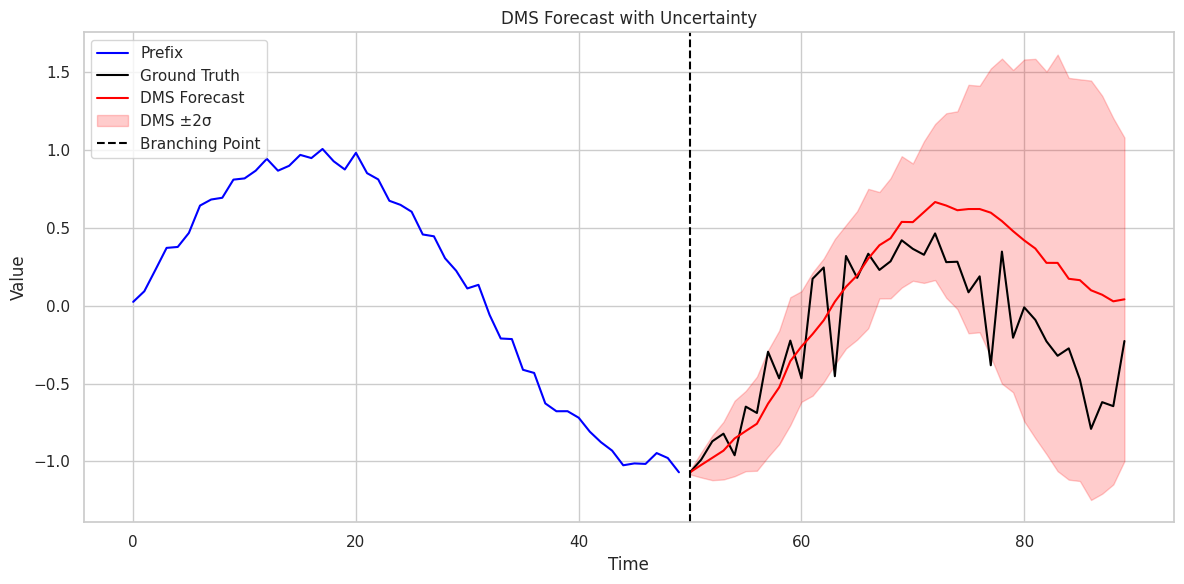

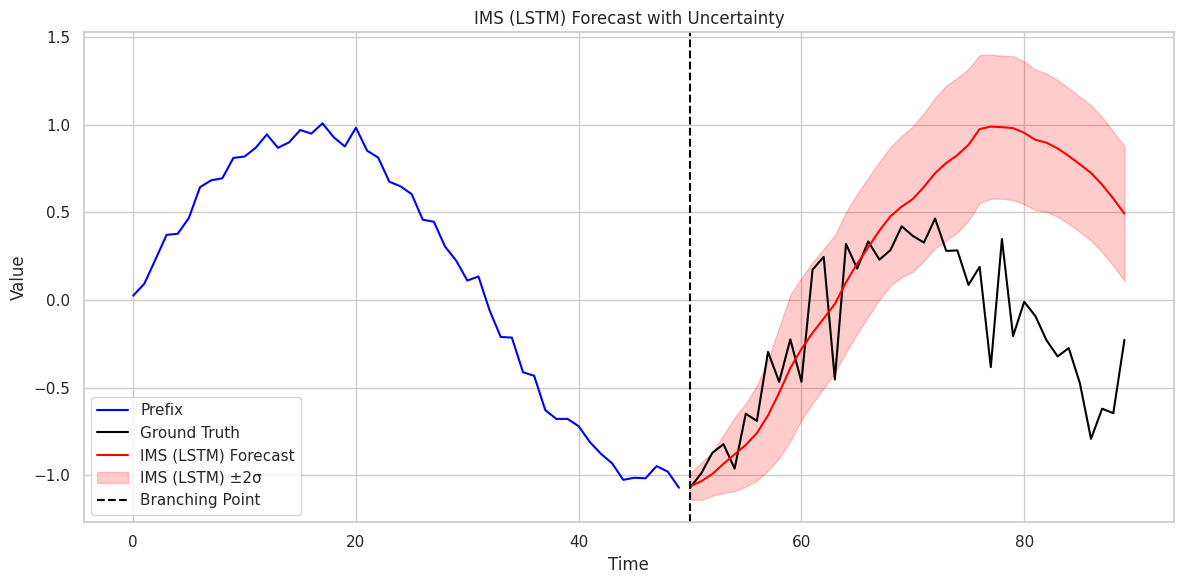

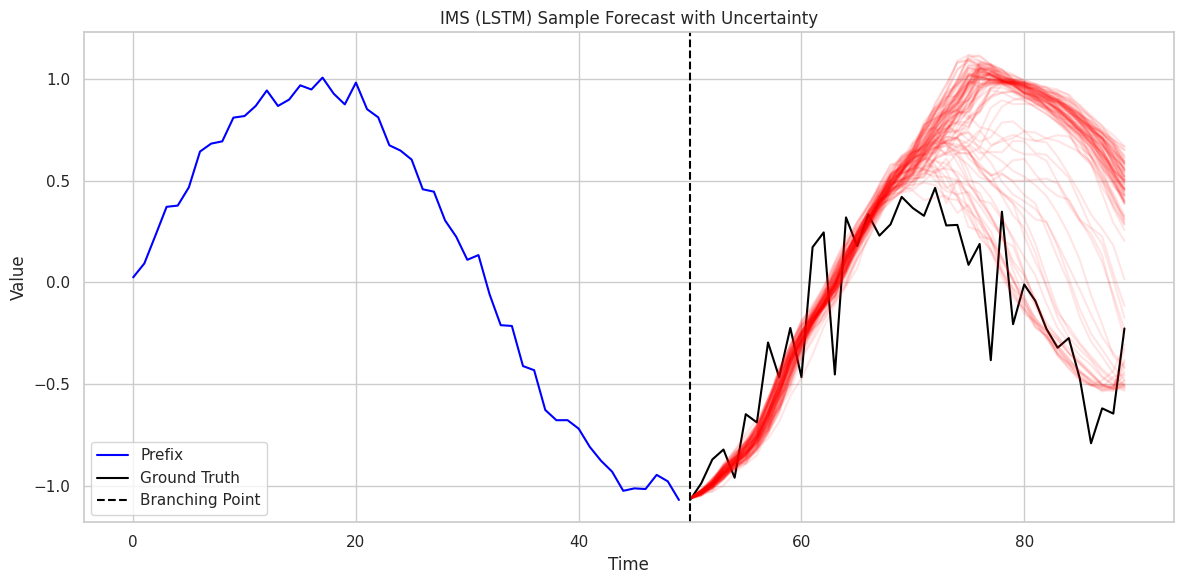

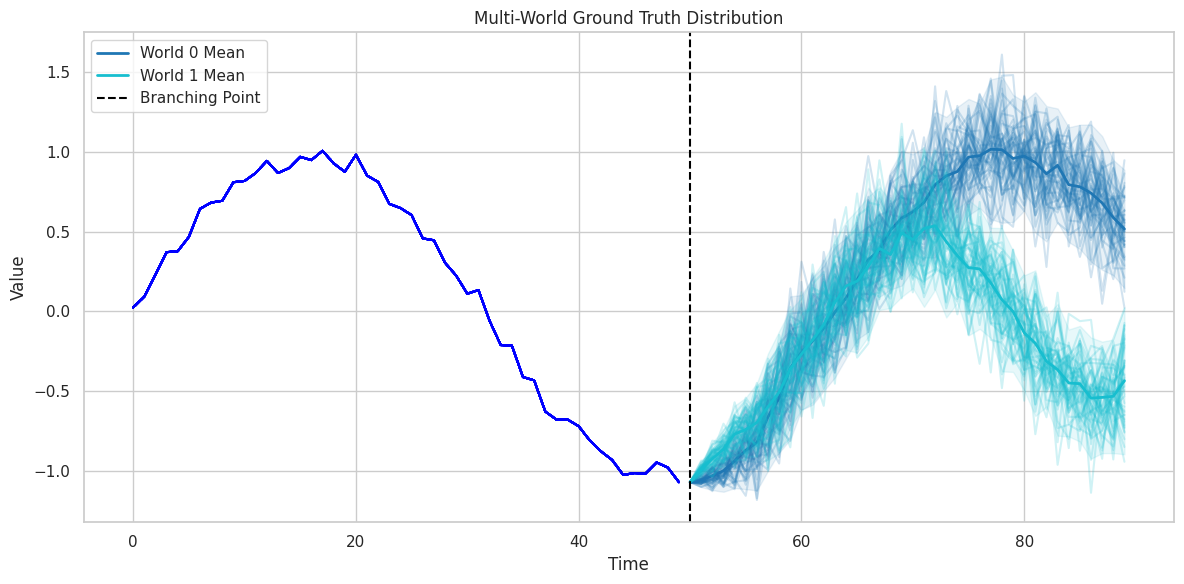

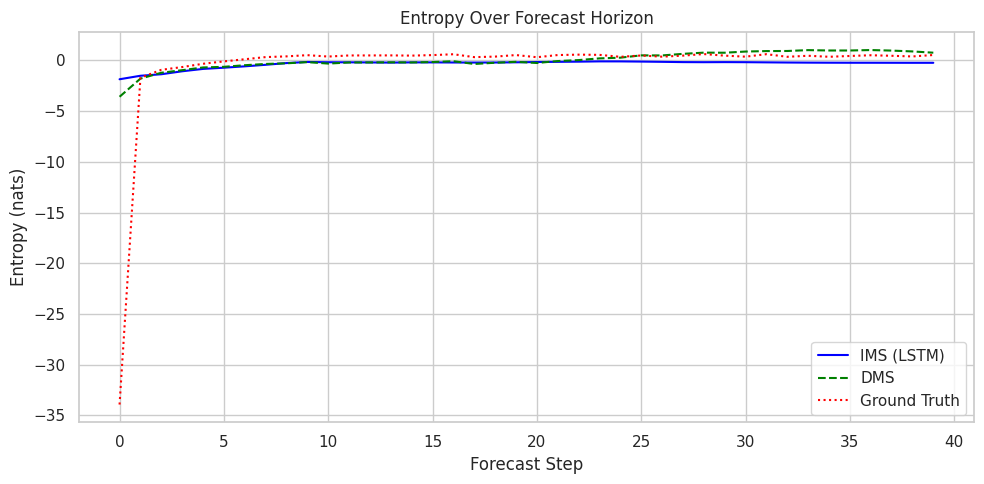

In [1]:
import os
# os.chdir('/home/kreffert/Probabilistic_LTSF/notebooks/experiments')
os.chdir('/pfs/data6/home/ma/ma_ma/ma_kreffert/Probabilistic_LTSF/notebooks/experiments/')
from multi_world_experiment import MultiWorldExperiment

experiment = MultiWorldExperiment(
    seq_len=100,
    prefix_len=50, 
    forecast_horizon=40
)

results = experiment.run_experiment(
    n_samples=100,
    n_worlds=2,
    dms_epochs=1000,
    ims_epochs=100,
    num_samples_ims=100,
)

In [2]:
samples_h = results["ims"]["samples"]
print(samples_h.shape)

torch.Size([100, 1, 40])


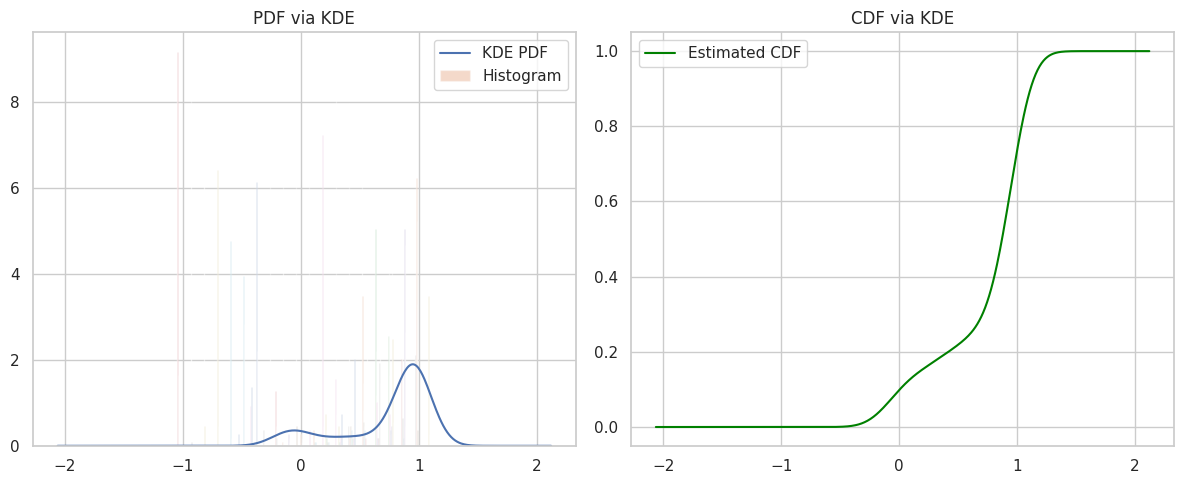

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example: 100 samples from IMS model at horizon h
samples_h = results["ims"]["samples"].squeeze().numpy() #np.random.normal(loc=0, scale=1, size=100)  # replace with your real samples
'''for h in range(samples_np.shape[1]):
    samples_h = samples_np[:, h]
    kde = gaussian_kde(samples_h)
    x_grid = np.linspace(samples_h.min() - 1, samples_h.max() + 1, 500)
    pdf_values = kde(x_grid)

    plt.figure()
    plt.title(f'PDF at forecast step {h+1}')
    plt.plot(x_grid, pdf_values, label='KDE PDF')
    plt.hist(samples_h, bins=20, density=True, alpha=0.3, label='Histogram')
    plt.legend()
    plt.show()'''
# 1. Fit the KDE
h = 30
kde = gaussian_kde(samples_h[:, h])

# 2. Evaluate the PDF over a range
x_grid = np.linspace(samples_h.min() - 1, samples_h.max() + 1, 500)
pdf_values = kde(x_grid)

# 3. (Optional) Estimate the CDF by integrating the PDF
cdf_values = np.cumsum(pdf_values)
cdf_values /= cdf_values[-1]  # normalize to [0, 1]

# 4. Plot PDF and CDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('PDF via KDE')
plt.plot(x_grid, pdf_values, label='KDE PDF')
plt.hist(samples_h, bins=20, density=True, alpha=0.3, label='Histogram')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('CDF via KDE')
plt.plot(x_grid, cdf_values, label='Estimated CDF', color='green')
plt.legend()

plt.tight_layout()
plt.show()


/scratch/slurm_tmpdir/job_235720/ipykernel_737298/1851389464.py:13: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='Horizon', y='Forecast', orient='h', bw=0.2, scale='width')
/scratch/slurm_tmpdir/job_235720/ipykernel_737298/1851389464.py:13: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=df, x='Horizon', y='Forecast', orient='h', bw=0.2, scale='width')


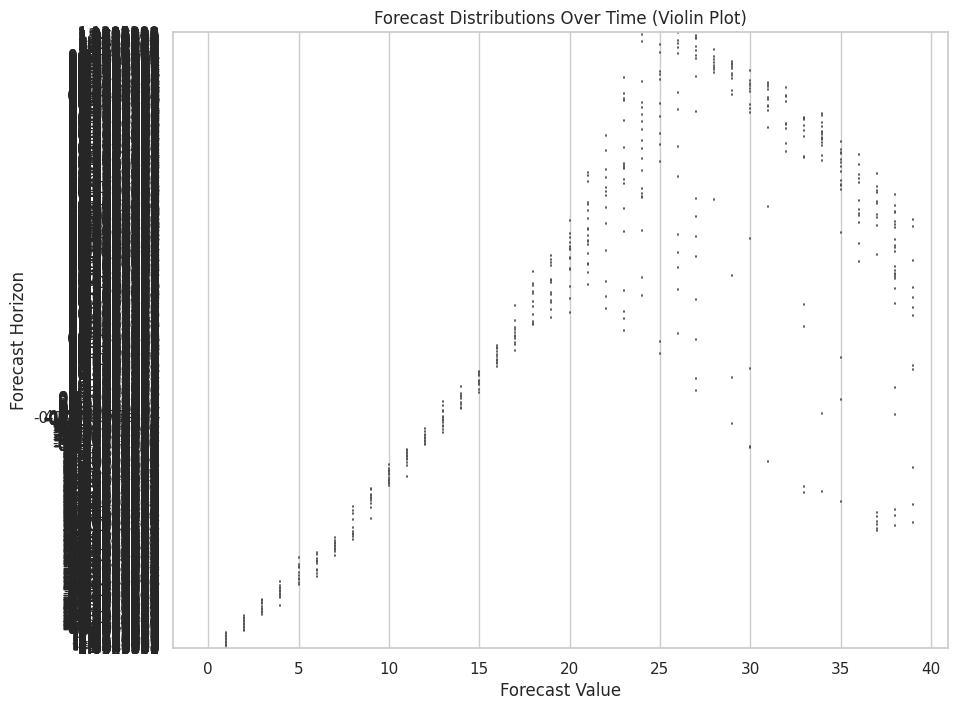

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppose you have shape (num_samples, forecast_horizon)
samples_np = results["ims"]["samples"].squeeze(1).numpy()  # (100, 40)

# Convert to long-form DataFrame
df = pd.DataFrame(samples_np)
df = df.melt(var_name='Horizon', value_name='Forecast')

plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='Horizon', y='Forecast', orient='h', bw=0.2, scale='width')
plt.title("Forecast Distributions Over Time (Violin Plot)")
plt.xlabel("Forecast Value")
plt.ylabel("Forecast Horizon")
plt.gca().invert_yaxis()  # Optional: earliest horizon at top
plt.show()

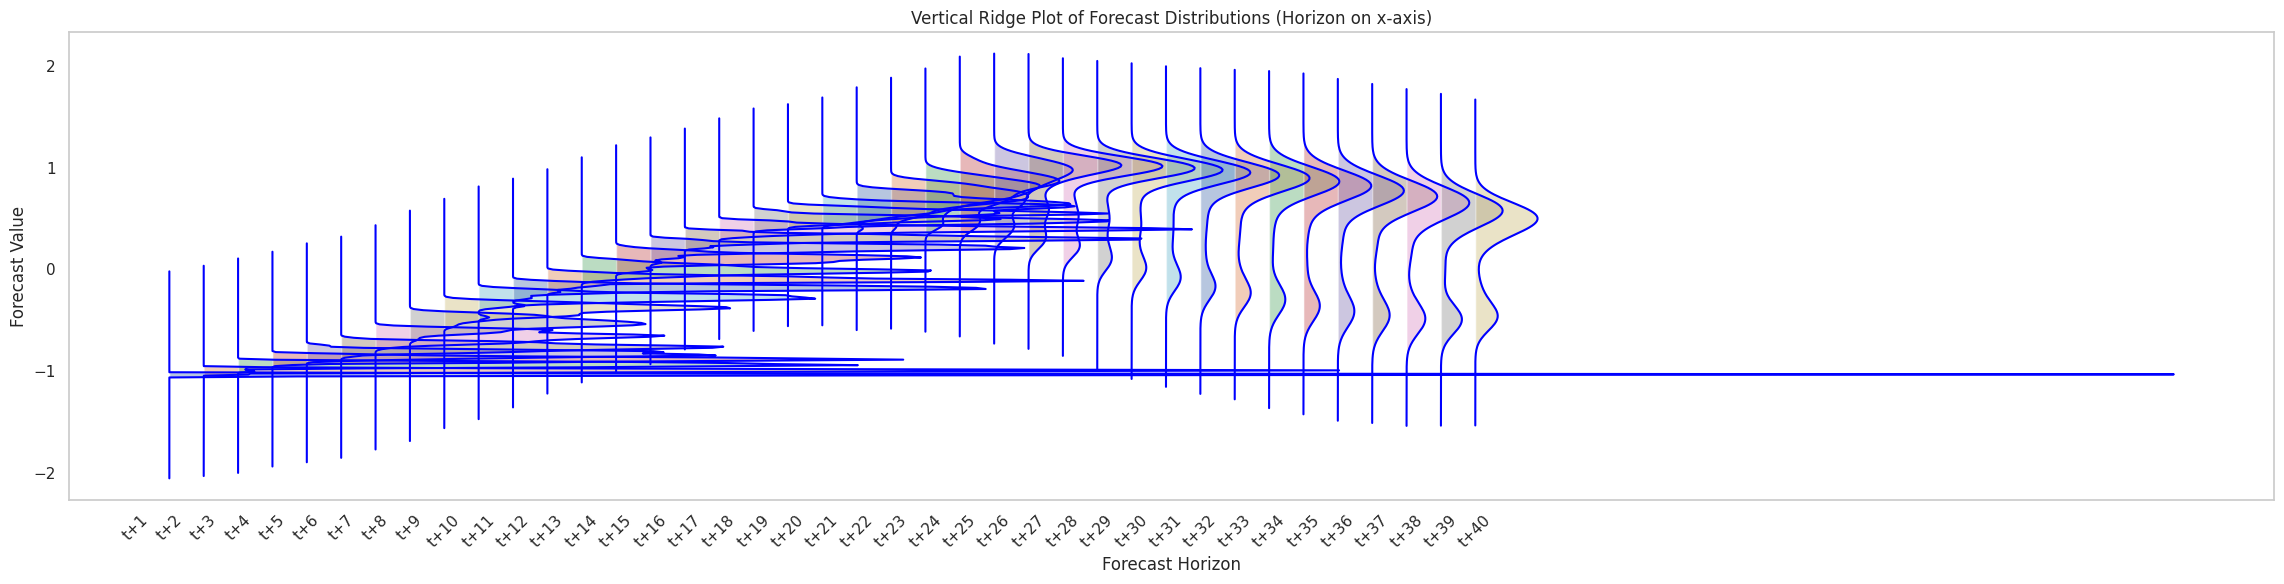

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

samples_np = results["ims"]["samples"].squeeze(1).numpy()  # shape: (100, 40)
num_steps = samples_np.shape[1]

plt.figure(figsize=(23, 6))

offset = 1.0  # horizontal spacing between KDEs

for h in range(num_steps):
    y_vals = samples_np[:, h]

    if np.var(y_vals) < 1e-6:
        continue  # Skip flat distributions

    kde = gaussian_kde(y_vals, bw_method=0.3)
    y_grid = np.linspace(y_vals.min() - 1, y_vals.max() + 1, 200)
    x_kde = kde(y_grid)

    # Shift horizontally by forecast step
    x_shifted = x_kde + h * offset

    plt.plot(x_shifted, y_grid, color='blue', linewidth=1.5)
    plt.fill_betweenx(y_grid, h * offset, x_shifted, alpha=0.4)

# Format plot
plt.ylabel("Forecast Value")
plt.xlabel("Forecast Horizon")
plt.xticks([h * offset for h in range(num_steps)], [f"t+{h+1}" for h in range(num_steps)], rotation=45)
plt.title("Vertical Ridge Plot of Forecast Distributions (Horizon on x-axis)")
plt.grid(False)
plt.tight_layout()
plt.show()


/scratch/slurm_tmpdir/job_235720/ipykernel_737298/3089514340.py:73: RuntimeWarning: invalid value encountered in divide
  pdf_norm = pdf / pdf.max() * 0.4


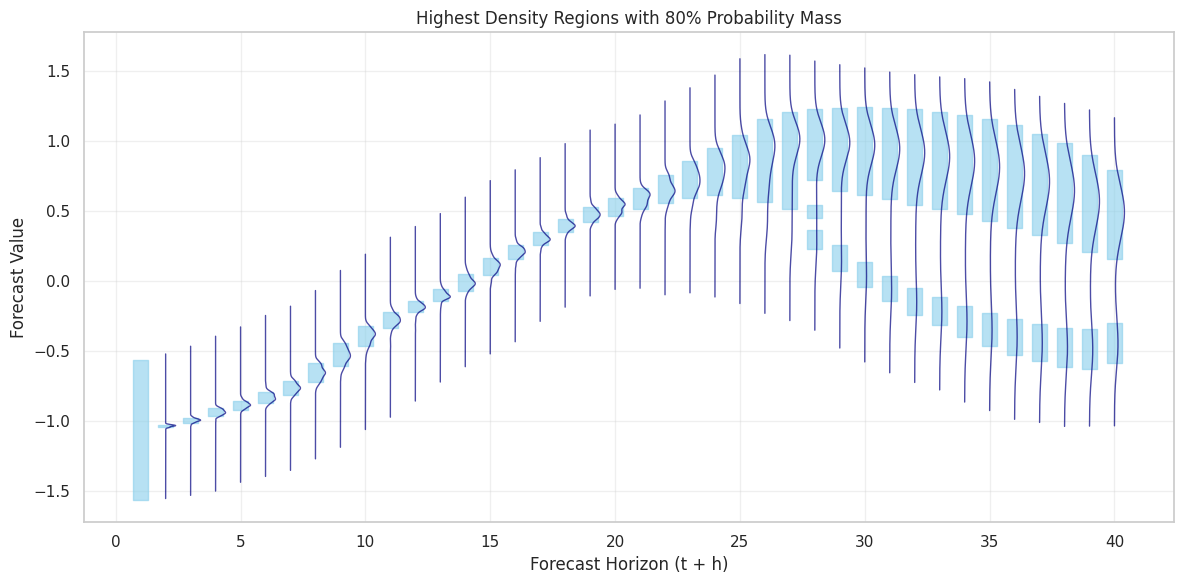

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

def highest_density_region(samples_np, prob_mass_threshold=0.9):
    """
    Plot the highest density regions for a multimodal distribution at each time step.
    
    Args:
        samples_np: NumPy array of shape (num_samples, num_steps)
        prob_mass_threshold: Desired probability mass (e.g., 0.9 for 90%)
    """
    num_samples, num_steps = samples_np.shape
    
    # Prepare the plot
    plt.figure(figsize=(12, 6))
    
    # Forecast horizon steps
    x = np.arange(1, num_steps + 1)
    
    # For each time step
    for h in range(num_steps):
        y_vals = samples_np[:, h]
        y_vals += np.random.normal(0, 1e-6, size=y_vals.shape)
        
        # Step 1: Fit a KDE to the data
        kde = gaussian_kde(y_vals, bw_method='scott')  # Using Scott's rule for bandwidth
        y_grid = np.linspace(y_vals.min() - 0.5, y_vals.max() + 0.5, 1000)
        pdf = kde(y_grid)
        
        # Step 2: Sort the PDF values in descending order
        sorted_indices = np.argsort(pdf)[::-1]
        sorted_pdf = pdf[sorted_indices]
        sorted_y = y_grid[sorted_indices]
        
        # Step 3: Find the density threshold lambda
        # Calculate cumulative probability mass
        delta_y = y_grid[1] - y_grid[0]
        cum_prob = np.cumsum(sorted_pdf) * delta_y
        
        # Find the index where cumulative probability first exceeds threshold
        threshold_idx = np.searchsorted(cum_prob, prob_mass_threshold)
        if threshold_idx >= len(sorted_pdf):
            threshold_idx = len(sorted_pdf) - 1
        
        # Get the density threshold lambda
        lambda_threshold = sorted_pdf[threshold_idx]
        
        # Step 4: Identify regions above the threshold
        hdr_mask = pdf >= lambda_threshold
        
        # Step 5: Find contiguous HDR regions (segments)
        change_points = np.diff(hdr_mask.astype(int))
        segment_starts = y_grid[:-1][change_points == 1]
        segment_ends = y_grid[:-1][change_points == -1]
        
        # Handle edge cases
        if hdr_mask[0]:
            segment_starts = np.insert(segment_starts, 0, y_grid[0])
        if hdr_mask[-1]:
            segment_ends = np.append(segment_ends, y_grid[-1])
        
        # Verify we have equal number of starts and ends
        assert len(segment_starts) == len(segment_ends), "Unequal segment starts and ends"
        
        # Step 6: Plot HDR segments for this time step
        for start, end in zip(segment_starts, segment_ends):
            plt.fill_betweenx([start, end], h + 0.7, h + 1.3, color='skyblue', alpha=0.6)
        
        # Additionally, plot a small distribution at each step
        # Normalize PDF for visualization
        pdf_norm = pdf / pdf.max() * 0.4
        plt.plot(h + 1 + pdf_norm, y_grid, color='navy', alpha=0.7, linewidth=1)
    
    # Add color bars at each time step to represent the density
    cmap = LinearSegmentedColormap.from_list("density_cmap", ["lightblue", "darkblue"])
    #plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), 
     #            label=f"Density (regions contain {int(prob_mass_threshold*100)}% probability mass)")
    
    # Format the plot
    plt.xlabel("Forecast Horizon (t + h)")
    plt.ylabel("Forecast Value")
    plt.title(f"Highest Density Regions with {int(prob_mass_threshold*100)}% Probability Mass")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt

# Example usage:
# Assuming results["ims"]["samples"] contains your data
highest_density_region(results["ims"]["samples"].squeeze(1).numpy(), prob_mass_threshold=0.8)
plt.show()

/scratch/slurm_tmpdir/job_235720/ipykernel_737298/1927561146.py:87: RuntimeWarning: invalid value encountered in divide
  pdf_norm = pdf / pdf.max() * 0.4


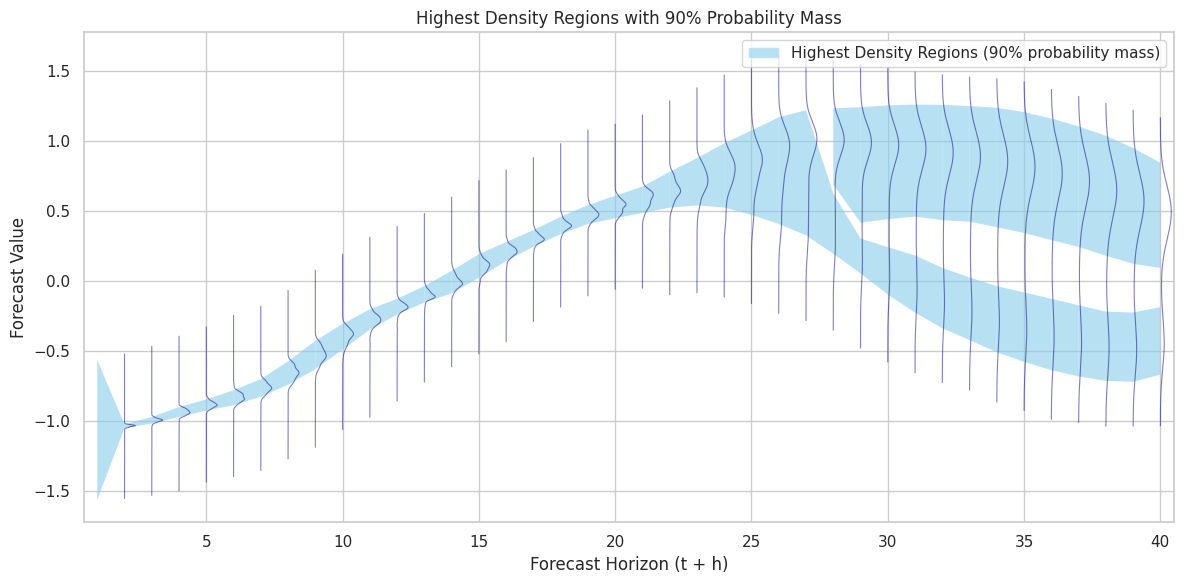

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors
from matplotlib.collections import PolyCollection

def highest_density_region(samples_np, prob_mass_threshold=0.9):
    """
    Plot the highest density regions for a multimodal distribution as a continuous area.
    
    Args:
        samples_np: NumPy array of shape (num_samples, num_steps)
        prob_mass_threshold: Desired probability mass (e.g., 0.9 for 90%)
    """
    num_samples, num_steps = samples_np.shape
    
    # Prepare the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Store HDR boundaries for each step to create continuous regions
    upper_bounds = []
    lower_bounds = []
    
    # For each time step
    for h in range(num_steps):
        y_vals = samples_np[:, h]
        y_vals += np.random.normal(0, 1e-6, size=y_vals.shape)
        
        # Step 1: Fit a KDE to the data
        kde = gaussian_kde(y_vals, bw_method='scott')  # Using Scott's rule for bandwidth
        y_grid = np.linspace(y_vals.min() - 0.5, y_vals.max() + 0.5, 1000)
        pdf = kde(y_grid)
        
        # Step 2: Sort the PDF values in descending order
        sorted_indices = np.argsort(pdf)[::-1]
        sorted_pdf = pdf[sorted_indices]
        sorted_y = y_grid[sorted_indices]
        
        # Step 3: Find the density threshold lambda
        # Calculate cumulative probability mass
        delta_y = y_grid[1] - y_grid[0]
        cum_prob = np.cumsum(sorted_pdf) * delta_y
        
        # Find the index where cumulative probability first exceeds threshold
        threshold_idx = np.searchsorted(cum_prob, prob_mass_threshold)
        if threshold_idx >= len(sorted_pdf):
            threshold_idx = len(sorted_pdf) - 1
        
        # Get the density threshold lambda
        lambda_threshold = sorted_pdf[threshold_idx]
        
        # Step 4: Identify regions above the threshold
        hdr_mask = pdf >= lambda_threshold
        
        # Step 5: Find contiguous HDR regions (segments)
        change_points = np.diff(hdr_mask.astype(int))
        segment_starts = np.where(change_points == 1)[0]
        segment_ends = np.where(change_points == -1)[0]
        
        # Handle edge cases
        if hdr_mask[0]:
            segment_starts = np.insert(segment_starts, 0, 0)
        if hdr_mask[-1]:
            segment_ends = np.append(segment_ends, len(hdr_mask)-1)
        
        # Convert indices back to y-values
        segment_starts_y = y_grid[segment_starts]
        segment_ends_y = y_grid[segment_ends]
        
        # Store all boundary points for this time step
        step_lower_bounds = []
        step_upper_bounds = []
        
        for start, end in zip(segment_starts_y, segment_ends_y):
            step_lower_bounds.append(start)
            step_upper_bounds.append(end)
        
        # Sort boundaries from bottom to top
        step_lower_bounds.sort()
        step_upper_bounds.sort()
        
        # Add boundaries for this time step
        lower_bounds.append(step_lower_bounds)
        upper_bounds.append(step_upper_bounds)
        
        # Additionally, plot a small distribution at each step (optional)
        pdf_norm = pdf / pdf.max() * 0.4
        plt.plot(h + 1 + pdf_norm, y_grid, color='navy', alpha=0.5, linewidth=0.8)
    
    # Plot continuous HDR regions that connect across time steps
    time_steps = np.arange(1, num_steps + 1)
    
    # Find the maximum number of segments in any time step
    max_segments = max(len(lowers) for lowers in lower_bounds)
    
    # Single color for all HDR regions
    hdr_color = 'skyblue'
    
    # For each possible segment (some time steps may have fewer segments)
    for i in range(max_segments):
        # Collect vertices for this segment across all time steps
        vertices = []
        
        for t in range(num_steps):
            # Only add this segment if it exists at this time step
            if i < len(lower_bounds[t]):
                # Add lower and upper points for this time step
                vertices.append((time_steps[t], lower_bounds[t][i]))
                vertices.append((time_steps[t], upper_bounds[t][i]))
        
        # If we have vertices, add them to the next and previous time steps to create continuous regions
        if vertices:
            # Sort vertices by x-coordinate (time step)
            vertices.sort(key=lambda v: v[0])
            
            # Create polygons for this segment
            for t in range(len(time_steps) - 1):
                segment_vertices = []
                # Find all vertices for current and next time step
                current_vertices = [v for v in vertices if v[0] == time_steps[t]]
                next_vertices = [v for v in vertices if v[0] == time_steps[t+1]]
                
                if current_vertices and next_vertices:
                    # Lower points from current to next time step
                    segment_vertices.append(current_vertices[0])  # Current lower point
                    segment_vertices.append(next_vertices[0])     # Next lower point
                    
                    # Upper points from next back to current time step
                    segment_vertices.append(next_vertices[1])     # Next upper point
                    segment_vertices.append(current_vertices[1])  # Current upper point
                    
                    # Create and add the polygon
                    polygon = plt.Polygon(segment_vertices, closed=True, 
                                         alpha=0.6, 
                                         facecolor=hdr_color, 
                                         edgecolor='none')
                    ax.add_patch(polygon)
    
    # Add simple legend instead of colorbar
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=hdr_color, alpha=0.6, 
                            label=f"Highest Density Regions ({int(prob_mass_threshold*100)}% probability mass)")]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Format the plot
    plt.xlabel("Forecast Horizon (t + h)")
    plt.ylabel("Forecast Value")
    plt.title(f"Highest Density Regions with {int(prob_mass_threshold*100)}% Probability Mass")
    #plt.grid(True, alpha=0.3)
    plt.xlim(0.5, num_steps + 0.5)
    plt.tight_layout()
    
    return plt

# Example usage:
# Assuming results["ims"]["samples"] contains your data
highest_density_region(results["ims"]["samples"].squeeze(1).numpy(), prob_mass_threshold=0.9)
plt.show()